# 4.4 Clustering: K-means, SOM


## K-means
https://towardsdatascience.com/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a


1. Initialize K & Centroids
2. Assigning Clusters to datapoints
3. Updating Centroids
4. Stopping Criterion



Clustering is a method to divide a set of data into a specific number of groups. It’s one of the popular method is k-means clustering. In k-means clustering, it partitions a collection of data into a k number group of data11,12. It classifies a given set of data into k number of disjoint cluster. K -means algorithm consists of two separate phases. In the first phase it calculates the k centroid and in the second phase it takes each point to the cluster which has nearest centroid from the respective data point. There are different methods to define the distance of the nearest centroid and one of the most used methods is Euclidean distance. Once the grouping is done it recalculate the new centroid of each
  
Nameirakpam Dhanachandra et al. / Procedia Computer Science 54 (2015) 764 – 771 767
cluster and based on that centroid, a new Euclidean distance is calculated between each center and each data point and assigns the points in the cluster which have minimum Euclidean distance. Each cluster in the partition is defined by its member objects and by its centroid. The centroid for each cluster is the point to which the sum of distances from all the objects in that cluster is minimized. So K -means is an iterative algorithm in which it minimizes the sum of distances from each object to its cluster centroid, over all clusters.



In [23]:
# EXEMPLE PRÀCTIC: Quantització d'imatges amb K-Means
# MIREIA: Explicar que és la quantització de colors en imatges
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

img = cv2.imread('Imatges/home.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# transformem la imatge en un vector de Width*height X 3 
Z = img_rgb.reshape((-1,3))
# la convertim a punt flotant
Z = np.float32(Z)

@interact
def kmeans_quantization(k=range(2, 10)):
    # definim els paràmetres de kmeans
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # apliquem kmeans
    ret,label,center=cv.kmeans(Z,k,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
    
    # construim una imatge on es substituixen els píxels originals per la mitjana del cluster
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    
    # mostrem resultats
    plt.subplot(2,2,1)
    plt.imshow(img_rgb)

    plt.subplot(2,2,2)
    plt.imshow(res2)
    
    fig = plt.gcf()
    fig.set_size_inches(25.5, 15.5)
    



interactive(children=(Dropdown(description='k', options=(2, 3, 4, 5, 6, 7, 8, 9), value=2), Output()), _dom_cl…

## SOM

Self Organizing Maps


https://github.com/JustGlowing/minisom

entrenant xarxa 3x3 ...
 [ 500 / 500 ] 100% - 5775.27 it/s - 0:00:00 left  - quantization error: 27.03110304005688
quantization...
building new image...
done.


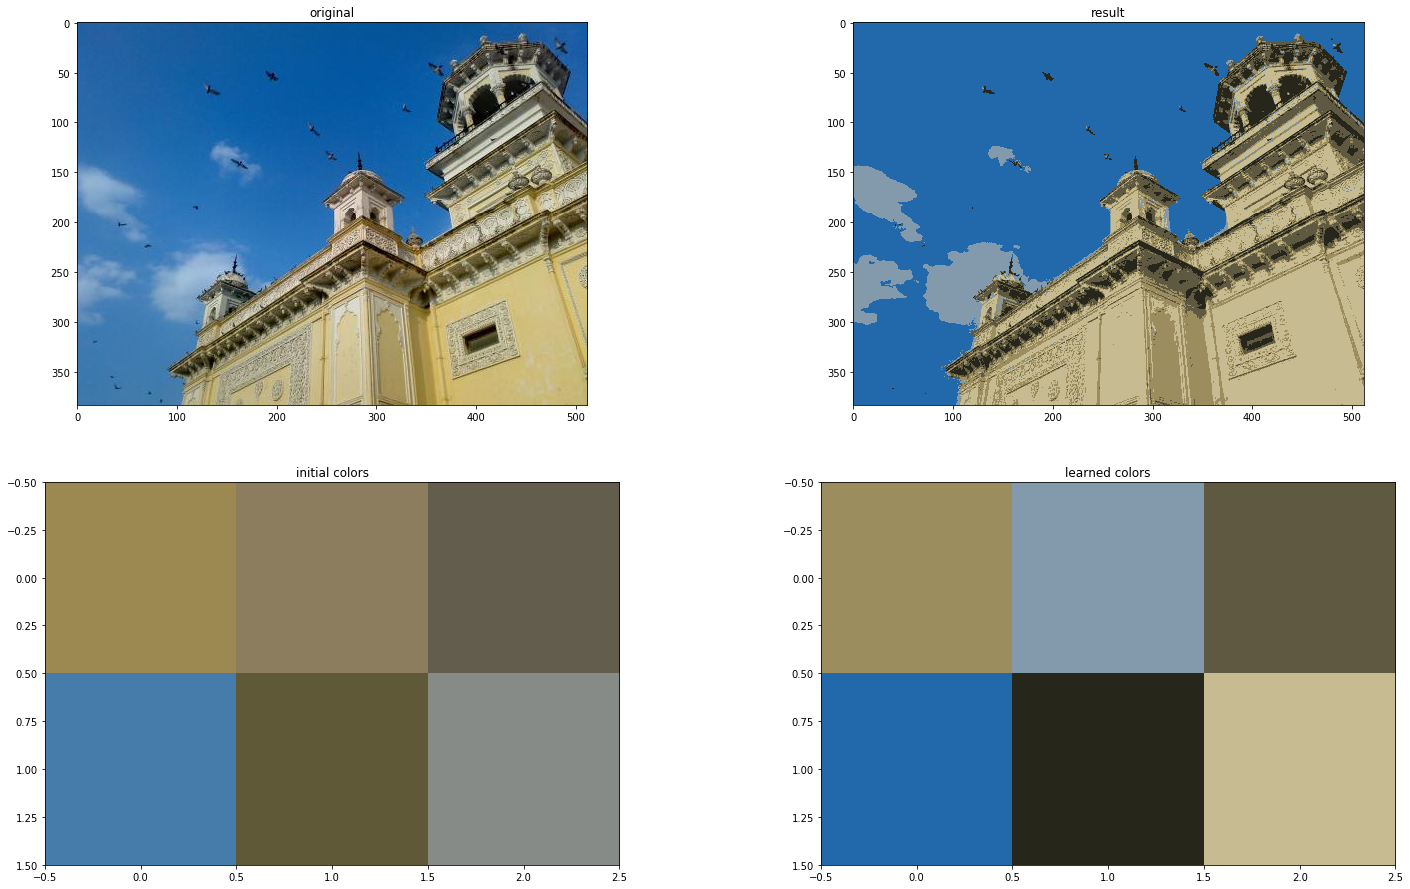

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Per a que funcioni això, obrir un terminal i fer pip install minisom (només cal el primer cop)
from minisom import MiniSom

img = cv2.imread('Imatges/home.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixels = img_rgb.reshape(-1,3)

print('entrenant xarxa 3x3 ...')
som = MiniSom(2, 3, 3, sigma=1., learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 500, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure()
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(img_rgb)
plt.subplot(2,2,2)
plt.title('result')

plt.imshow(np.uint8(clustered))


plt.subplot(2,2,3)
plt.title('initial colors')
plt.imshow(np.uint8(starting_weights), interpolation='none')
plt.subplot(2,2,4)
plt.title('learned colors')
plt.imshow(np.uint8(som.get_weights()), interpolation='none')


fig = plt.gcf()
fig.set_size_inches(25.5, 15.5)
plt.show()
